In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

In [2]:
wiki = pd.read_html('https://zh.wikipedia.org/wiki/%E8%87%BA%E7%81%A350%E6%8C%87%E6%95%B8')
compo = wiki[0]
s1 = list(compo['股票代號'])
s2 = list(compo['股票代號.1'])
df1 = pd.DataFrame(s1+s2)
symbols = []
for i in df1[0]:
    symbols.append(i.replace("臺證所：", '')+'.TW')

In [3]:
def get_data(tickers_list, start_date,end_date):
    data = yf.download(tickers=tickers_list,
    interval="1d", # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max #
    start=start_date,
    end=end_date)
    return data['Adj Close']

In [4]:
wiki = pd.read_html('https://zh.wikipedia.org/wiki/%E8%87%BA%E7%81%A350%E6%8C%87%E6%95%B8')
compo = wiki[0]
s1 = list(compo['股票代號'])
s2 = list(compo['股票代號.1'])
df1 = pd.DataFrame(s1+s2)
symbol = ['^TWII']
for i in df1[0]:
    symbol.append(i.replace("臺證所：", '')+'.TW')

In [5]:
tw = get_data(symbol,'2016-01-01','2020-12-31')

[*********************100%***********************]  51 of 51 completed


start_date = "2016-01-01"
end_date = "2020-12-31"
for i in symbols:
    print(i) # print out the ticker so we know the downloading progress
    try:
        prc = yf.download(i, interval="1d", start=start_date, end=end_date)
        prc = pd.DataFrame(prc['Adj Close']) # select adjusted close price only prc.columns = [i]
        try:
            df_prc = pd.concat([df_prc, prc], axis=1) # if the dataframe already exists, join the newly downloaded data to the existing table
        except:
            df_prc = prc # create the dataframe for the first ticker
        stk = yf.Ticker(i)
        try:
            stk.info['floatShares']
        except:
            stk.info['floatShares'] = None
        try:
            stk.info['sharesOutstanding']
        except:
            stk.info['sharesOutstanding'] = None
        if stk.info['floatShares']:
            mcap = prc * stk.info['floatShares']
        elif stk.info['sharesOutstanding']:
            mcap = prc * stk.info['sharesOutstanding']
        else:
            mcap = prc * (stk.info['marketCap']/stk.info['previousClose'])
        try:
            df_mcap = pd.concat([df_mcap, mcap], axis=1)
        except:
            df_mcap = mcap
    except:
        
        continue

In [6]:
df_mcap = pd.read_csv(r'C:\Users\Simon\政大\投資組合\df_mcap.csv')

In [7]:
df_prc = tw.resample('D').ffill().pct_change()
df_prc.dropna(inplace=True)

In [8]:
df_prc

,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1590.TW,2002.TW,2207.TW,2303.TW,2308.TW,...,4938.TW,5871.TW,5876.TW,5880.TW,6415.TW,6505.TW,8046.TW,8454.TW,9910.TW,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.009560,0.003710,0.006906,0.001742,0.004399,0.006645,-0.008572,0.000000,-0.004237,-0.003356,...,0.016949,-0.007463,-0.011525,0.000000,0.010695,-0.007802,0.004546,0.014151,0.012270,-0.004825
2016-01-06,-0.013258,0.000000,0.001372,0.000000,0.001460,-0.009901,-0.002882,0.019205,0.000000,-0.003367,...,-0.056944,0.000000,0.001999,0.000000,0.015873,0.009174,-0.019608,-0.013953,-0.012121,-0.010492
2016-01-07,0.049904,-0.005545,0.000000,0.001739,0.005831,-0.006667,0.008671,-0.028264,-0.025532,0.000000,...,-0.032401,-0.035714,-0.005319,-0.014815,-0.009115,-0.010390,-0.021538,-0.037736,0.021472,-0.017312
2016-01-08,-0.012797,-0.014870,-0.021918,-0.012153,-0.013044,0.003356,-0.002865,-0.020776,-0.004367,-0.013513,...,0.019787,0.003899,0.003676,0.000000,0.019711,-0.002625,0.028302,-0.014706,0.081081,0.005337
2016-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,0.004673,0.009050,0.010776,0.017291,0.015075,0.010297,0.004132,0.012862,0.039572,0.022088,...,0.002950,0.015625,0.010101,0.000000,-0.002141,0.012739,0.029674,0.029079,0.005128,0.010582


In [9]:
df_mcap['Date']=pd.to_datetime(df_mcap.Date, format='%Y-%m-%d')

In [10]:
df_mcap = df_mcap.set_index(df_mcap['Date'])

In [11]:
df_mcap.drop('Date',axis = 'columns' , inplace = True)

In [12]:
df_mcap

,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1590.TW,2002.TW,2207.TW,2303.TW,2308.TW,...,4904.TW,4938.TW,5871.TW,5876.TW,5880.TW,6415.TW,6505.TW,8046.TW,8454.TW,9910.TW
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,7.882739e+10,2.395326e+11,3.498090e+11,2.223612e+11,1.645834e+11,1.954348e+10,1.657523e+11,8.705476e+10,1.058666e+11,2.606831e+11,...,9.187466e+10,8.969454e+10,4.730047e+10,7.810318e+10,7.885548e+10,3.109748e+10,1.400858e+11,6.226762e+09,5.919462e+09,4.430695e+10
2016-01-05,7.958101e+10,2.404214e+11,3.522248e+11,2.227486e+11,1.653074e+11,1.967333e+10,1.643316e+11,8.705476e+10,1.054180e+11,2.598084e+11,...,9.104195e+10,9.121478e+10,4.694748e+10,7.720306e+10,7.885548e+10,3.143007e+10,1.389928e+11,6.255066e+09,6.003228e+09,4.485059e+10
2016-01-06,7.852596e+10,2.404214e+11,3.527079e+11,2.227486e+11,1.655487e+11,1.947855e+10,1.638580e+11,8.872658e+10,1.054180e+11,2.589336e+11,...,9.062561e+10,8.602060e+10,4.694748e+10,7.735736e+10,7.885548e+10,3.192897e+10,1.402679e+11,6.132417e+09,5.919462e+09,4.430695e+10
2016-01-07,8.244471e+10,2.390882e+11,3.527079e+11,2.231360e+11,1.665140e+11,1.934869e+10,1.652787e+11,8.621884e+10,1.027265e+11,2.589336e+11,...,9.104195e+10,8.323348e+10,4.527079e+10,7.694590e+10,7.768725e+10,3.163795e+10,1.388106e+11,6.000334e+09,5.696086e+09,4.525833e+10
2016-01-08,8.138967e+10,2.355329e+11,3.449773e+11,2.204243e+11,1.643420e+11,1.941362e+10,1.648051e+11,8.442760e+10,1.022779e+11,2.554345e+11,...,9.159709e+10,8.488042e+10,4.544728e+10,7.722879e+10,7.768725e+10,3.226156e+10,1.384463e+11,6.170155e+09,5.612320e+09,4.892792e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2.061916e+11,3.607321e+11,5.755977e+11,3.516440e+11,2.500105e+11,1.248441e+11,2.699912e+11,1.753171e+11,5.156341e+11,5.137544e+11,...,1.024334e+11,1.150938e+11,1.998565e+11,1.334364e+11,1.690453e+11,2.025744e+11,2.154248e+11,3.615872e+10,2.064519e+10,9.131606e+10
2020-12-25,2.066745e+11,3.623718e+11,5.768409e+11,3.526603e+11,2.515909e+11,1.242753e+11,2.683281e+11,1.739191e+11,5.178495e+11,5.168681e+11,...,1.026021e+11,1.168167e+11,1.992339e+11,1.336051e+11,1.698969e+11,2.012814e+11,2.147409e+11,3.552620e+10,2.015674e+10,9.085016e+10
2020-12-28,2.076402e+11,3.656512e+11,5.830569e+11,3.587582e+11,2.553837e+11,1.255551e+11,2.694368e+11,1.761559e+11,5.383419e+11,5.282848e+11,...,1.034459e+11,1.171613e+11,2.023470e+11,1.349547e+11,1.698969e+11,2.008504e+11,2.174764e+11,3.658039e+10,2.074288e+10,9.131606e+10


In [13]:
S_cutoff = pd.to_numeric(df_mcap.quantile(.5, axis=1, numeric_only=False))
S_cutoff.head()

Date
2016-01-04    9.240231e+10
2016-01-05    9.188871e+10
2016-01-06    9.099725e+10
2016-01-07    9.028714e+10
2016-01-08    9.198805e+10
Name: 0.5, dtype: float64

In [14]:
ME_port = pd.DataFrame(index=df_mcap.index, columns=df_mcap.columns)
ME_port[df_mcap.gt(S_cutoff, axis=0)] = 'Big'
ME_port[df_mcap.le(S_cutoff, axis=0)] = 'Small'
ME_port.head()

,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1590.TW,2002.TW,2207.TW,2303.TW,2308.TW,...,4904.TW,4938.TW,5871.TW,5876.TW,5880.TW,6415.TW,6505.TW,8046.TW,8454.TW,9910.TW
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,Small,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Small,Small,Small,Small,Big,Small,Small,Small
2016-01-05,Small,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Small,Small,Small,Small,Big,Small,Small,Small
2016-01-06,Small,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Small,Small,Small,Small,Big,Small,Small,Small
2016-01-07,Small,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Big,Small,Small,Small,Small,Small,Big,Small,Small,Small
2016-01-08,Small,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Small,Small,Small,Small,Big,Small,Small,Small


In [15]:
ME_port.tail()

,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1590.TW,2002.TW,2207.TW,2303.TW,2308.TW,...,4904.TW,4938.TW,5871.TW,5876.TW,5880.TW,6415.TW,6505.TW,8046.TW,8454.TW,9910.TW
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,Big,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Big,Small,Small,Big,Big,Small,Small,Small
2020-12-25,Big,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Big,Small,Small,Big,Big,Small,Small,Small
2020-12-28,Big,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Big,Small,Small,Big,Big,Small,Small,Small
2020-12-29,Big,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Big,Small,Small,Big,Big,Small,Small,Small
2020-12-30,Big,Big,Big,Big,Big,Small,Big,Small,Big,Big,...,Small,Small,Big,Small,Small,Big,Big,Small,Small,Small


In [16]:
mom = (1+df_prc).rolling(11).apply(np.prod)

In [17]:
mom.dropna(inplace=True)
mom

,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1590.TW,2002.TW,2207.TW,2303.TW,2308.TW,...,4938.TW,5871.TW,5876.TW,5880.TW,6415.TW,6505.TW,8046.TW,8454.TW,9910.TW,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-15,1.028681,0.981447,1.042818,0.987805,1.041056,0.863788,0.997143,0.917696,0.953390,0.969799,...,0.916667,0.940298,0.975305,0.955556,0.962567,1.024707,0.912121,0.941038,1.018405,0.956589
2016-01-16,1.018939,0.977819,1.035665,0.986087,1.036496,0.858086,1.005764,0.917696,0.957447,0.973064,...,0.901389,0.947368,0.986676,0.955556,0.952381,1.032765,0.907994,0.927907,1.006061,0.961227
2016-01-17,1.032629,0.977819,1.034247,0.986087,1.034985,0.866667,1.008671,0.900404,0.957447,0.976352,...,0.955817,0.947368,0.984708,0.955556,0.937500,1.023377,0.926154,0.941038,1.018405,0.971418
2016-01-18,0.972578,0.968401,1.034247,0.982639,1.015942,0.906040,0.988539,0.932133,0.973799,0.949324,...,1.035008,1.000000,0.975936,0.966165,0.993430,1.036745,0.985849,0.995098,1.003003,0.994794
2016-01-19,0.981481,0.990566,1.057423,0.989455,1.029369,0.916388,1.005747,0.949081,0.978070,0.928082,...,1.047761,0.992233,0.971029,0.977444,0.985825,1.030263,0.967890,1.042289,0.911111,0.995048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,1.007059,1.020000,1.040359,1.032738,1.016603,1.021028,0.993840,0.998395,1.062500,1.014257,...,1.007429,1.012658,0.997481,1.005038,1.000000,1.012903,0.965616,1.031667,0.975000,1.018687
2020-12-27,0.994193,1.009133,1.028825,1.010189,0.997494,0.974359,0.991803,0.959877,1.041203,1.004032,...,0.989781,0.981595,0.983851,0.995012,0.910331,0.994720,0.954674,1.024834,0.955882,1.001885
2020-12-28,1.008206,0.998507,1.044543,1.029154,1.018915,1.003409,0.995902,0.995261,1.055375,1.030364,...,1.001473,0.984848,0.993789,1.000000,0.910156,1.014894,0.983003,1.042553,0.967901,1.015719


In [18]:
L_cutoff = pd.to_numeric(mom.quantile(.3,axis=1,numeric_only=False))
H_cutoff = pd.to_numeric(mom.quantile(.7,axis=1,numeric_only=False))

MOM_port = pd.DataFrame(index=mom.index, columns=mom.columns)
MOM_port[mom.gt(H_cutoff, axis=0)] = 'Winner'
MOM_port[(mom.le(H_cutoff, axis=0)) & (mom.ge(L_cutoff, axis=0))] = 'Neutral'
MOM_port[mom.lt(L_cutoff, axis=0)] = 'Loser'
MOM_port.head()

,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1590.TW,2002.TW,2207.TW,2303.TW,2308.TW,...,4938.TW,5871.TW,5876.TW,5880.TW,6415.TW,6505.TW,8046.TW,8454.TW,9910.TW,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-15,Winner,Neutral,Winner,Winner,Winner,Loser,Winner,Loser,Neutral,Neutral,...,Loser,Neutral,Neutral,Neutral,Neutral,Winner,Loser,Neutral,Winner,Neutral
2016-01-16,Winner,Neutral,Winner,Neutral,Winner,Loser,Winner,Loser,Neutral,Neutral,...,Loser,Neutral,Neutral,Neutral,Neutral,Winner,Loser,Neutral,Winner,Neutral
2016-01-17,Winner,Neutral,Winner,Neutral,Winner,Loser,Winner,Loser,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Loser,Winner,Loser,Neutral,Winner,Neutral
2016-01-18,Neutral,Loser,Winner,Neutral,Winner,Loser,Neutral,Loser,Neutral,Loser,...,Winner,Neutral,Neutral,Loser,Neutral,Winner,Neutral,Neutral,Neutral,Neutral
2016-01-19,Neutral,Neutral,Winner,Neutral,Winner,Loser,Winner,Loser,Neutral,Loser,...,Winner,Neutral,Neutral,Neutral,Neutral,Winner,Neutral,Winner,Loser,Neutral


In [19]:
TMP = (ME_port + MOM_port).shift(2)
TMP.dropna(how='all', inplace = True)
TMP

,1101.TW,1216.TW,1301.TW,1303.TW,1326.TW,1590.TW,2002.TW,2207.TW,2303.TW,2308.TW,...,4938.TW,5871.TW,5876.TW,5880.TW,6415.TW,6505.TW,8046.TW,8454.TW,9910.TW,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-17,SmallWinner,BigNeutral,BigWinner,BigWinner,BigWinner,SmallLoser,BigWinner,SmallLoser,BigNeutral,BigNeutral,...,SmallLoser,SmallNeutral,SmallNeutral,SmallNeutral,SmallNeutral,BigWinner,SmallLoser,SmallNeutral,SmallWinner,NaN
2016-01-20,SmallNeutral,BigLoser,BigWinner,BigNeutral,BigWinner,SmallLoser,BigNeutral,SmallLoser,BigNeutral,BigLoser,...,SmallWinner,SmallNeutral,SmallNeutral,SmallLoser,SmallNeutral,BigWinner,SmallNeutral,SmallNeutral,SmallNeutral,NaN
2016-01-21,SmallNeutral,BigNeutral,BigWinner,BigNeutral,BigWinner,SmallLoser,BigWinner,SmallLoser,BigNeutral,BigLoser,...,SmallWinner,SmallNeutral,SmallNeutral,SmallNeutral,SmallNeutral,BigWinner,SmallNeutral,SmallWinner,SmallLoser,NaN
2016-01-22,SmallNeutral,BigWinner,BigWinner,BigNeutral,BigWinner,SmallLoser,BigNeutral,SmallLoser,BigNeutral,BigLoser,...,SmallNeutral,SmallNeutral,SmallNeutral,SmallNeutral,SmallWinner,BigWinner,SmallNeutral,SmallWinner,SmallLoser,NaN
2016-01-23,SmallNeutral,BigWinner,BigWinner,BigNeutral,BigWinner,SmallLoser,BigNeutral,SmallLoser,BigNeutral,BigLoser,...,SmallWinner,SmallNeutral,SmallNeutral,SmallNeutral,SmallWinner,BigWinner,SmallNeutral,SmallWinner,SmallLoser,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,BigNeutral,BigWinner,BigWinner,BigNeutral,BigWinner,SmallLoser,BigWinner,SmallLoser,BigNeutral,BigLoser,...,SmallLoser,BigWinner,SmallNeutral,SmallNeutral,BigWinner,BigNeutral,SmallLoser,SmallWinner,SmallWinner,NaN
2020-12-25,BigNeutral,BigWinner,BigWinner,BigNeutral,BigNeutral,SmallNeutral,BigWinner,SmallLoser,BigNeutral,BigNeutral,...,SmallLoser,BigWinner,SmallNeutral,SmallNeutral,BigNeutral,BigNeutral,SmallWinner,SmallWinner,SmallWinner,NaN
2020-12-26,BigNeutral,BigWinner,BigWinner,BigWinner,BigNeutral,SmallLoser,BigWinner,SmallLoser,BigNeutral,BigLoser,...,SmallLoser,BigWinner,SmallLoser,SmallNeutral,BigNeutral,BigNeutral,SmallLoser,SmallWinner,SmallWinner,NaN


In [35]:
unique_port = ['SmallLoser', 'SmallNeutral', 'SmallWinner', 'BigLoser','BigNeutral', 'BigWinner']
RET_port = pd.DataFrame(index=TMP.index, columns=unique_port)
N_firm = pd.DataFrame(index=TMP.index, columns=unique_port)
for p in unique_port:
    TMP_RET = df_prc[TMP==p].apply(pd.to_numeric)
    TMP_ME = df_prc[TMP==p].apply(pd.to_numeric)
    TMP_PROD = TMP_RET*TMP_ME
    RET_port[p] = TMP_PROD.sum(axis=1)/TMP_ME.sum(axis=1)  # value-weighted 
    N_firm[p] = TMP_RET.count(axis=1)
RET_port = RET_port.dropna(how='all')*100
RET_port

C:\Users\Simon\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,SmallLoser,SmallNeutral,SmallWinner,BigLoser,BigNeutral,BigWinner
Date,,,,,,
2016-01-20,-3.910271,-2.538568,-5.277427,-3.496574,-2.160704,-4.292478
2016-01-21,5.903933,-2.866511,-4.035522,-1.773148,-3.279155,65.670455
2016-01-22,2.209940,5.885187,21.984072,3.187409,3.164842,1.870440
2016-01-27,48.042565,1.508949,5.142559,-3.199605,6.716327,13.863312
2016-01-28,-5.163852,2.801932,7.126156,1.620609,2.764267,9.506508
...,...,...,...,...,...,...
2020-12-18,-1.157809,-1.156582,12.622819,-2.879422,-2.157042,-3.266875
2020-12-23,3.303935,4.331889,8.333408,1.833131,-2.870142,-1.419170
2020-12-24,7.122905,4.790045,4.323949,1.597621,1.789941,1.246063


In [21]:
RET_port

,SmallLoser,SmallNeutral,SmallWinner,BigLoser,BigNeutral,BigWinner
Date,,,,,,
2016-01-20,-3.910271,-2.538568,-5.277427,-3.496574,-2.160704,-4.292478
2016-01-21,5.903933,-2.866511,-4.035522,-1.773148,-3.279155,65.670455
2016-01-22,2.209940,5.885187,21.984072,3.187409,3.164842,1.870440
2016-01-27,48.042565,1.508949,5.142559,-3.199605,6.716327,13.863312
2016-01-28,-5.163852,2.801932,7.126156,1.620609,2.764267,9.506508
...,...,...,...,...,...,...
2020-12-18,-1.157809,-1.156582,12.622819,-2.879422,-2.157042,-3.266875
2020-12-23,3.303935,4.331889,8.333408,1.833131,-2.870142,-1.419170
2020-12-24,7.122905,4.790045,4.323949,1.597621,1.789941,1.246063


In [23]:
def gmvp(S):
    ONE = np.ones(len(S))
    return (inv(S) @ ONE) / (ONE.T @ inv(S) @ ONE)
def msrp(ER, S):
    ONE = np.ones(len(S))
    return (inv(S) @ ER) / (ONE.T @ inv(S) @ ER)
def pret(w, R):
    return (w @ R)
def pvar(w, S):
    return (w @ S @ w)
def pret(w, ER):
    return (w @ ER)
def sharpe(w, ER, S):
    return -(w @ ER)/np.sqrt(w @ S @ w)

In [24]:
WSize = 60
AvgER_rolling = RET_port.rolling(WSize).mean()
CovER_rolling = RET_port.rolling(WSize).cov()
Backtest_R = pd.DataFrame(index=RET_port.index,columns=['GMVP','MSRP'])
for d in RET_port.index:
    ER = AvgER_rolling.loc[d]
    S = CovER_rolling.loc[d]
    R = RET_port.loc[d]
    Backtest_R.loc[d,'GMVP'] = pret(gmvp(S), R)
    Backtest_R.loc[d,'MSRP'] = pret(msrp(ER, S), R)

In [25]:
Backtest_R.dropna(how='all')

,GMVP,MSRP
Date,,
2016-06-30,2.77372,3.62771
2016-07-01,2.2791,1.90398
2016-07-06,-2.12812,-2.62683
2016-07-07,2.14326,1.52249
2016-07-13,3.82582,7.56741
...,...,...
2020-12-18,-2.43727,6.62185
2020-12-23,0.690431,-4.33727
2020-12-24,2.86922,-3.18453


In [26]:
from scipy.optimize import Bounds
bounds = Bounds(0, 1)
x0 = np.ones(6)
cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1})
WSize = 60
AvgER_rolling = RET_port.rolling(WSize).mean()
CovER_rolling = RET_port.rolling(WSize).cov()
Backtest_Rnoss = pd.DataFrame(index=RET_port.index,columns=['GMVPnoss','MSRPnoss'])

for d in RET_port.index:
    ER = AvgER_rolling.loc[d]
    S = CovER_rolling.loc[d]
    R = RET_port.loc[d]
    NGMVPnoss = minimize(pvar, x0, method='SLSQP', args=S, constraints=cons,options={'disp': True, 'ftol': 1e-9}, bounds=bounds) 
    if NGMVPnoss.success == True :
        Backtest_Rnoss.loc[d,'GMVPnoss'] = pret(NGMVPnoss.x, R)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit 

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit 

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 44.01463320602095
            Iterations: 13
            Function evaluations: 68
            Gradient evaluations: 9
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 43.76634383262331
            Iterations: 26
            Function evaluations: 222
            Gradient evaluations: 22
Optimization terminated successfully    (Exit mode 0)
            Current function value: 44.05896345984598
            Iterations: 26
            Function evaluations: 236
            Gradient evaluations: 24
Optimization terminated successfully    (Exit mode 0)
            Current function value: 42.36242445196111
            Iterations: 16
            Function evaluations: 117
            Gradient evaluations: 16
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 42.498923197641645
            Iterations: 26
      

Optimization terminated successfully    (Exit mode 0)
            Current function value: 33.3715762861974
            Iterations: 15
            Function evaluations: 114
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 33.90411487493195
            Iterations: 15
            Function evaluations: 114
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.64591188984967
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.66968914875623
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.730826927517505
            Iterations: 13
            Function eval

Optimization terminated successfully    (Exit mode 0)
            Current function value: 36.01077944893663
            Iterations: 10
            Function evaluations: 78
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 36.13155570615068
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 36.263879838103065
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 26.446050485020255
            Iterations: 12
            Function evaluations: 90
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 26.348511719028526
            Iterations: 12
            Function evalu

Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.486241930542697
            Iterations: 13
            Function evaluations: 98
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.483170418391307
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.57581474014138
            Iterations: 15
            Function evaluations: 113
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.47722897385567
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.63989803501749
            Iterations: 14
            Function eva

Optimization terminated successfully    (Exit mode 0)
            Current function value: 22.927179830366708
            Iterations: 15
            Function evaluations: 113
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 22.99260891974021
            Iterations: 16
            Function evaluations: 121
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 22.97173171474943
            Iterations: 15
            Function evaluations: 115
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 22.973902352324178
            Iterations: 17
            Function evaluations: 125
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 22.812195135114276
            Iterations: 14
            Function e

Optimization terminated successfully    (Exit mode 0)
            Current function value: 37.27320678113197
            Iterations: 15
            Function evaluations: 114
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40.02397575417861
            Iterations: 13
            Function evaluations: 100
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40.32746658647089
            Iterations: 15
            Function evaluations: 114
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.38958947670754
            Iterations: 13
            Function evaluations: 99
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 44.723027937286304
            Iterations: 12
            Function eval

Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.14343865294117
            Iterations: 11
            Function evaluations: 87
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.11899821469489
            Iterations: 12
            Function evaluations: 93
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.15342941218047
            Iterations: 13
            Function evaluations: 100
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.26252378231132
            Iterations: 13
            Function evaluations: 101
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 31.03019834159308
            Iterations: 16
            Function evalua

Optimization terminated successfully    (Exit mode 0)
            Current function value: 19.685387165692312
            Iterations: 13
            Function evaluations: 98
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19.65022776628782
            Iterations: 13
            Function evaluations: 97
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.50626573014566
            Iterations: 13
            Function evaluations: 97
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 20.64647866335862
            Iterations: 13
            Function evaluations: 97
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.285021163898275
            Iterations: 12
            Function evalua

Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.507861524748588
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.227020792850908
            Iterations: 16
            Function evaluations: 120
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.257861104795452
            Iterations: 15
            Function evaluations: 114
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.26195806194162
            Iterations: 16
            Function evaluations: 121
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 18.181130601189384
            Iterations: 20
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.023589541695663
            Iterations: 12
            Function evaluations: 91
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.113505122930468
            Iterations: 14
            Function evaluations: 105
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.171469030950205
            Iterations: 13
            Function evaluations: 97
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.186981514240451
            Iterations: 14
            Function evaluations: 104
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.262360576034801
            Iterations: 16
            Function evalua

Optimization terminated successfully    (Exit mode 0)
            Current function value: 15.832772953690727
            Iterations: 13
            Function evaluations: 99
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 15.935681801272047
            Iterations: 13
            Function evaluations: 99
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.093244983935367
            Iterations: 13
            Function evaluations: 99
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17.068969182056357
            Iterations: 11
            Function evaluations: 87
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17.17467752916524
            Iterations: 12
            Function eval

Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.80088663095589
            Iterations: 11
            Function evaluations: 84
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.919658387332486
            Iterations: 11
            Function evaluations: 84
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.902547520696528
            Iterations: 11
            Function evaluations: 84
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.99737180096919
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.47744104607695
            Iterations: 13
            Function evalu

Optimization terminated successfully    (Exit mode 0)
            Current function value: 39.622142036262666
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 39.235394744507154
            Iterations: 9
            Function evaluations: 69
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40.39390892926498
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40.35496008120933
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40.20146325944878
            Iterations: 12
            Function evaluati

In [27]:
bounds = Bounds(0, 1)
x0 = np.ones(6)
cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1})
WSize = 60
AvgER_rolling = RET_port.rolling(WSize).mean()
CovER_rolling = RET_port.rolling(WSize).cov()

for d in RET_port.index:
    ER = AvgER_rolling.loc[d]
    S = CovER_rolling.loc[d]
    R = RET_port.loc[d]
    NMSRPnoss = minimize(sharpe, x0, method='SLSQP', constraints=cons, args=(ER, S), options={'disp': True, 'ftol': 1e-9}, bounds = bounds) 
    if NMSRPnoss.success == True:
        Backtest_Rnoss.loc[d,'MSRPnoss'] = pret(NMSRPnoss.x, R)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit 

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit 

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Inequality constraints incompatible    (Exit 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.36096653418630026
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.3752875404491702
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.36724890417605416
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.36474733009301824
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.346817014984464
            Iterations: 10
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.12969381965365376
            Iterations: 16
            Function evaluations: 115
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.13496130183056926
            Iterations: 16
            Function evaluations: 113
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.19884097580656362
            Iterations: 12
            Function evaluations: 87
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1649797684049387
            Iterations: 13
            Function evaluations: 93
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.19646036605341954
            Iterations: 13
            F

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2547021872400512
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2575422867005121
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.25587703332752315
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.3440264958774316
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.35444981224518957
            Iterations: 7
            Function e

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.10006409699797629
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.09011349950180188
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.08067501711055165
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.08105443392724117
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.09990754334595131
            Iterations: 10
            Fu

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.26518516195011566
            Iterations: 14
            Function evaluations: 92
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.261267605288947
            Iterations: 14
            Function evaluations: 92
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.26452736493086937
            Iterations: 15
            Function evaluations: 106
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.29871544751646645
            Iterations: 16
            Function evaluations: 117
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.3077256391594445
            Iterations: 16
            Fun

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.04254364028907965
            Iterations: 15
            Function evaluations: 106
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.06297785312282568
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.05595233189615553
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.0647184026067726
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.07762827280126043
            Iterations: 17
            Fu

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2159174111773485
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.21857263850037936
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.22702341014288607
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.22740515539966247
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.22251485737431773
            Iterations: 10
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.22335801880472184
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.24190058538583842
            Iterations: 14
            Function evaluations: 99
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2778334635540388
            Iterations: 15
            Function evaluations: 106
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.28449497513850713
            Iterations: 13
            Function evaluations: 93
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.280591285118199
            Iterations: 12
            Func

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1526994253028993
            Iterations: 14
            Function evaluations: 101
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1781769345957656
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1669886392653932
            Iterations: 15
            Function evaluations: 106
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.202088443099776
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.20283524591893598
            Iterations: 14
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1903404693643143
            Iterations: 17
            Function evaluations: 115
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.19015327216067035
            Iterations: 16
            Function evaluations: 107
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.17947077041305923
            Iterations: 21
            Function evaluations: 142
            Gradient evaluations: 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.22478352010974287
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.24182146015770412
            Iterations: 13
            

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.209935122328742
            Iterations: 16
            Function evaluations: 106
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2540130616353071
            Iterations: 15
            Function evaluations: 100
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.265564659172406
            Iterations: 14
            Function evaluations: 94
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.27528554509109
            Iterations: 15
            Function evaluations: 101
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.25435984448158566
            Iterations: 15
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.31155340040058965
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2650003162375876
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2856385122401324
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.2899530930071865
            Iterations: 11
            Function evaluations: 81
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.28903513681751053
            Iterations: 12
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.38009019616069006
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.40790966948505974
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4592005617887199
            Iterations: 12
            Function evaluations: 86
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.4837287527035143
            Iterations: 12
            Function evaluations: 90
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.5420746540110102
            Iterations: 13
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.32177062880244284
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.3251931863924909
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.34612675655923686
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.3474133901113967
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.3419768464441795
            Iterations: 11
            Funct

In [28]:
NMSRPnoss.x

array([1.01539948e-16, 0.00000000e+00, 2.76650712e-01, 1.53839361e-16,
       9.43022199e-03, 7.13919067e-01])

In [29]:
final = Backtest_Rnoss.join(Backtest_R).dropna(how='all')

In [30]:
final[50:]

,GMVPnoss,MSRPnoss,GMVP,MSRP
Date,,,,
2017-04-21,6.05157,6.46912,5.6905,-19.8253
2017-04-26,-2.09297,-0.408097,-1.86201,-45.9377
2017-04-27,-1.30339,-3.35469,-1.38682,10.1643
2017-04-28,0.189415,1.5464,-0.00503546,-12.3159
2017-05-04,6.50893,3.38617,8.22473,-98.8964
...,...,...,...,...
2020-12-18,-2.26409,0.794785,-2.43727,6.62185
2020-12-23,0.738783,1.24219,0.690431,-4.33727
2020-12-24,2.86137,2.09415,2.86922,-3.18453


In [31]:
CumRet = (1 + final.divide(100)).cumprod()
CumRet.tail(50)

,GMVPnoss,MSRPnoss,GMVP,MSRP
Date,,,,
2020-08-28,6.71864,965.742,7.99227,-378.717
2020-09-02,6.56771,941.121,7.81272,-366.231
2020-09-03,6.70525,967.726,7.96944,-375.975
2020-09-04,6.70533,993.15,7.96586,-385.723
2020-09-09,6.62779,978.813,7.97339,-395.02
2020-09-10,6.65686,973.564,8.02954,-395.985
2020-09-11,6.79188,977.759,8.34844,-433.062
2020-09-16,7.45472,1188.94,9.17469,-533.074
2020-09-17,7.33085,1170.06,9.14342,-575.09


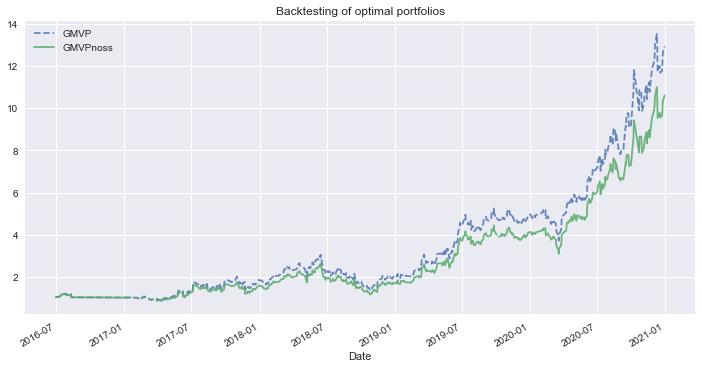

In [34]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn')
CumRet['GMVP'].plot(alpha=0.85, linestyle="--")
#CumRet['MSRP'].plot(alpha=0.85, linestyle="-.")
CumRet['GMVPnoss'].plot(alpha=0.85, linestyle="-")
#CumRet['MSRPnoss'].plot(alpha=0.85, linestyle="-")
plt.legend()
plt.title('Backtesting of optimal portfolios')
plt.show()

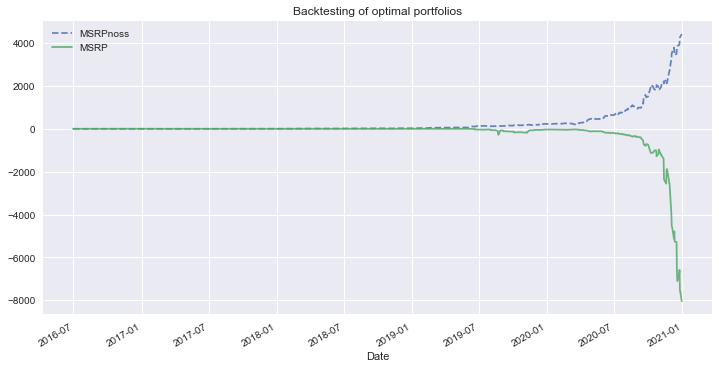

In [33]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn')
CumRet['MSRPnoss'].plot(alpha=0.85, linestyle="--")
CumRet['MSRP'].plot(alpha=0.85, linestyle="-")
plt.legend()
plt.title('Backtesting of optimal portfolios')
plt.show()